In [37]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 99
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [52]:
# load dataset
dataset = load_iris()
dataset.keys()
# dataset to df
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
data['class'] = dataset.target
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [53]:
# sort of columns
rs = list()
for k,v in data.dtypes.items():
    if v == np.float64:
        rs.append([k, 1,np.nanmax(data[k].values) - np.nanmin(data[k].values)])
    else:
        rs.append([k, 0,len(data[k].unique())])
columns_sorted = pd.DataFrame(rs).set_index(0).sort_values([1,2], ascending = [True, True]).index.tolist()
data = data[columns_sorted]
# reset index
data.reset_index(drop = True, inplace = True)
# sort of records
data.sort_values(columns_sorted, inplace = True)


In [57]:
# normalize data
clf = MinMaxScaler()
datat = pd.DataFrame(clf.fit_transform(data), columns = columns_sorted)
datat.index = data.index

In [78]:
# estimate diff between records for each column
dd = datat.diff(axis = 0)
dd["euclidean"] = (dd*dd).sum(axis = 1).values / np.max((dd*dd).sum(axis = 1).values)

<AxesSubplot:>

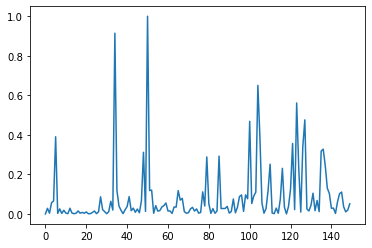

In [79]:
dd.reset_index()["euclidean"].plot()

In [89]:
dd.style.background_gradient(cmap='viridis', axis = 0)

,class,petal width (cm),sepal width (cm),sepal length (cm),petal length (cm),euclidean
13,nan,nan,nan,nan,nan,0.000000
12,0.000000,0.000000,0.000000,0.138889,0.050847,0.028332
9,0.000000,0.000000,0.041667,0.027778,0.016949,0.003620
37,0.000000,0.000000,0.208333,0.000000,-0.016949,0.056585
32,0.000000,0.000000,0.208333,0.083333,0.016949,0.065579
8,0.000000,0.041667,-0.500000,-0.222222,-0.016949,0.390367
38,0.000000,0.000000,0.041667,0.000000,-0.016949,0.002621
1,0.000000,0.000000,0.000000,0.138889,0.016949,0.025356
25,0.000000,0.000000,0.000000,0.027778,0.033898,0.002488
3,0.000000,0.000000,0.041667,-0.111111,-0.016949,0.018610
